<font color="#483D8B">
<h1  align="center"> Recommender System & Collaborative Filtering</h1>
<div align="center">
<font size=3><b>
<br>Ruobing Wang
<br>March 29, 2019
<br></font></b></div>


---------------

## Overview

Recently, recommender systems become one of the most common used and understandable applications of data science. Basically, it is a subclass of information filtering system which seeks to predict the rating or preference a user would give to an item.Because the higher demand of the internet and information overload problem. The recommender system becomes necessary for online business to help user to provide personalized recommendations and services. For business, it will improver the income since it attracts more costumers and it is also good for users since it can extract the useful information for them form the huge information stream. It is widely used in like Netflix or YouTube or Amazon. Recommender systems are utilized in a variety of areas.

In this lab, we will use the dataset of Book-Crossing which is collected by Ziegler in 2004 from book crossing community. It contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. The format of the dataset comprises 3 tables:
- BX-Users
    - Contain the users which IDs have been map to integers anonymously. It provides Location and Age but may be Null values if not available.

- BX-Books
    - Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset.
 
- BX-Book-Ratings
    - Contains the book rating information. Expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

And we also need the library of Surprise.


There are two popular ways to approach recommender system. Collaborative filtering and content based recommendations.

Collaborative Filtering, we just need the users' historical preference (rating for here) on a set of items(books). Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future.

It usually expressed by two categories. Explicit Rating, is a rate given by a user to an item on a scale. Implicit Rating, suggests users preference indirectly. Here we successfully segregate these two categories. For rate = 0 it is implicit. For (1-10), it is explicit.

For this lab, I will focus on the collaborative filtering approach. Basically: the user is recommended items that people with similar tastes and preferences liked in the past, which means, this method predicts unknown rating by using the similarities between users.

In conclusion, we will use collaborative filtering approach to build a popularity recommender system. And then use the surprise package to run 5 fold cross validation on the collaborative filter models for the dataset. Using the algorithms:SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()
and bechmark RMSE, MAE, and execution time. Then select the algorithm with the best RMSE. And use Grid search to find best the hyper-parameters for the model.

Summary of Objectives:

- Popularity Recommender
- Content Filtering (CF) Recommender
    - Use 5 fold cross validation to benchmark performance of several algorithms
    - Use Grid search to find best hyper-parameters for the top performing CF algorithm

References:

- http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

- https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847

- https://medium.com/@m_n_malaeb/the-easy-guide-for-building-python-collaborative-filtering-recommendation-system-in-2017-d2736d2e92a8

- https://stats.stackexchange.com/questions/17436/logistic-regression-with-lbfgs-solver

- https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b 

- https://surprise.readthedocs.io/en/stable/getting_started.html 
- https://github.com/NicolasHug/Surprise/blob/master/examples/benchmark.py 
- https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv



-------------

## Data

This dataset is collected by Ziegler in 2004 from book crossing community. It contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

The Book-Crossing dataset comprises 3 tables.

- BX-Users
    - Contains the users. Note that user IDs (`User-ID`) have been anonymized and map to integers. Demographic data is provided (`Location`, `Age`) if available. Otherwise, these fields contain NULL-values.

- BX-Books
    - Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (`Book-Title`, `Book-Author`, `Year-Of-Publication`, `Publisher`), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (`Image-URL-S`, `Image-URL-M`, `Image-URL-L`), i.e., small, medium, large. These URLs point to the Amazon web site.

- BX-Book-Ratings
    - Contains the book rating information. Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.



First, let's see what the data includes. Since we do not need Urls, we drop them here.

Loading data:

In [50]:
import pandas as pd

books = pd.read_csv('BX-CSV-Dump/BX-Books.csv', sep = ';', error_bad_lines= False, encoding= 'latin-1')
books.columns = ['ISBN', 'bookTitle','bookAuthor','yearOfPublication','publisher','imageUrls','imageUrlM','imageUrlL']
books.drop(['imageUrls', 'imageUrlM', 'imageUrlL'], axis=1,inplace=True)

books.head()


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:30

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [51]:
import pandas as pd
users = pd.read_csv('BX-CSV-Dump/BX-Users.csv', sep = ';', error_bad_lines= False, encoding= 'latin-1')
users.columns = ['userID', 'Location', 'Age']
users.head()


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [52]:
ratings = pd.read_csv('BX-CSV-Dump/BX-Book-Ratings.csv', sep = ';', error_bad_lines= False, encoding= 'latin-1')
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [53]:
print (books.shape)
print (users.shape)
print (ratings.shape)


(271360, 5)
(278858, 3)
(1149780, 3)


we have 5 columns (ISBN,bookTitle,bookAuthor,yearOfPublication,publisher) and 271360 observations for books

we have 3 columns (userID, Location, Age) and 278858 observations for users. We see in the age, it has Null value since the age is not available when he collected the data as I mentioned in overview.

we have 3 columns (userID, ISBN, bookRating) and 1149780 observations for ratings. Ratings are from 1-10 and implicit rating is expressed by 0.


---------------


## Exploratory Data Analysis

### Books Dataset

We now check the data types for each of the columns, and correct the missing & discrepant entries. I am also adjusting the column width to display full text of columns.

In [54]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [55]:
pd.set_option('display.max_colwidth',-1)

#### yearOfPublication

Now let's check the unique values for this attribute.

In [56]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Here, we can see an interesting issues, we can see 'DK Publishing Inc' and 'Gallimard' incorrectly load as the year of publication in the dataset. Also, we can see some of the values are strings and some years are numbers. We will deal with these two problems in the following code:

Check the location of the wrong input: "DK Publishing Inc"

In [57]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [58]:
books.loc[books.ISBN == '0789566953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789566953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789566953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789566953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [59]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

We can see the problem is the book title include all of the stuffs we need, all information is in a same chunk. And the following information is shifted to left. Based on the information it gave, we revised the format.

In [60]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [61]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "ean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

Nothing special here, it is the same thing we did in the "DK Publishing Inc"

And then we change all of the strings in the dataset to numeric

In [62]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication,errors = 'coerce')

In [63]:
print (sorted(books['yearOfPublication'].unique()))

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]


We can see the result of the yearOfPublication which has 0-2050. Since the dataset was built in 2014, after 2014 the data is predicted. For here all the year after 2016 we assume is invalid since it may have been updated. For all the invalid entries (including 0), it is easier for us to convert these to NaNs, and then replace them with mean values of remaining years.

In [64]:
import numpy as np
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace = True)

In [65]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace = True)

In [66]:
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

#### Publisher

We can also notice that from the dataset, the publisher can be set as "NaN" after some investigations we change them to 'others' ast publisher name since it cannot be inferred.

In [67]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [68]:
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

### Users Dataset

In [69]:
print (users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


As I mentioned, it includes 3 columns (userID, Location, Age) and 278858 observations for users. We see in the age, it has Null value since the age is not available when he collected the data as I mentioned in overview.

In [70]:
users.dtypes

userID      int64  
Location    object 
Age         float64
dtype: object

#### Age

Upon checking the unique values, userID looks correct. However, Age column has a NaN and some very high values. 

To avoid some prejudice. Ages below 5 and above 90 should be replaced with NaNs. And then all the NaNs are replaced with mean value of Age, and set data type as int.

In [71]:
users.userID.values

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [72]:
print( sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [73]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [74]:
print(sorted (users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


### Ratings Dataset

Let's check the what inside the rating dataset. Since there are lots of people do not rate the books. It should have bunch of zeros in the dataset. Let's check how many percentage of the people do not rate books. The total of the books rate should be number of users × number of books.

In [75]:
ratings.shape

(1149780, 3)

In [76]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users*n_books)

75670906880


In [77]:
ratings.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


Now ratings dataset should have userID and ISBN which exist in respective tables, viz. users and books.

In [78]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [79]:
print (ratings.shape)
print (ratings_new.shape)

(1149780, 3)
(1031136, 3)


From this result, we can see another issue: users have rated some of the books, which are not part of original books dataset. Sparsity of the dataset can be calculated as below:

In [80]:
sparsity = 1.0-len(ratings_new)/float(n_users*n_books)

In [81]:
print ('The sparsity level of Book Crossing dataset is ' + str(sparsity*100)+' %')

The sparsity level of Book Crossing dataset is 99.99863734155898 %


It is so sparsity. We also need to segregate the explicit ratings (1-10) and implicit ratings(0) since for here we will only use explicit ratings for building our recommendation system.

### Segregate implicit and explicit.

#### Use only explicit book ratings for recommenders. (Use rating_new)

In [82]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [83]:
# Since there are lots of data of zero bookRating. Let us remove at first
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [84]:
users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

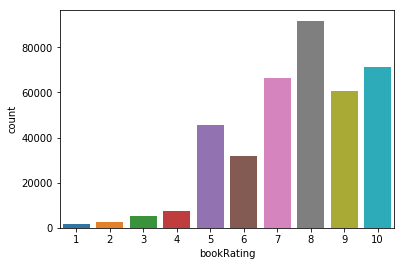

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = ratings_explicit, x = 'bookRating')
plt.show()

#### Use only explicit book ratings for recommenders.  (Use ratings)

In [86]:
ratings_impl = ratings[ratings.bookRating == 0]
ratings = ratings[ratings.bookRating != 0]

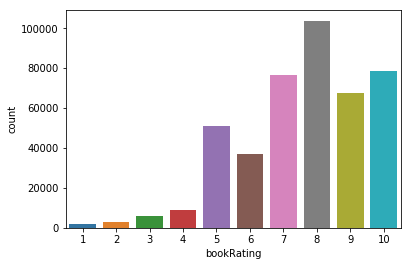

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = ratings, x = 'bookRating')
plt.show()

As the result, we can see, the tendency are similar. The difference is the size of each bookRating which is due to for the difference between ratings_new which includes the ISBN and userID with ratings. Since ratings includes the people who rate other books which not include in the original dataset.

And also, since when the rating equals to 8, the count will be the largest which means people who rate tend to rate 8 points. 

### Filter out users with less than 3 explicit book ratings

To make our system to be more accurate, we can remove people who rate less than 3 explicit books

In [89]:
keep_users = ratings_explicit.userID.unique()[ratings_explicit.userID.value_counts() >=3]
users = users[users.userID.isin(keep_users)]
users.shape

(20194, 3)

In [90]:
users.head(5)

,userID,Location,Age
7,8,"timmins, ontario, canada",34
8,9,"germantown, tennessee, usa",34
11,12,"fort bragg, california, usa",34
13,14,"mediapolis, iowa, usa",34
15,16,"albuquerque, new mexico, usa",34


-----------------------------

## Models

###  Popularity based recommender and show the top-10 most popular books

Then we can build a simple popularity based recommendation system based on count of user ratings for different books. We can see the top book is: The Lovely Bones: A Novel and the author is Alice Sebold.

In [91]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating',ascending = False).head(10)
print("Following books are recommended")
top10.merge(books,left_index = True, right_on = 'ISBN')

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


At first, remove books with less than 10 explicit ratings.

In [92]:
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts>=10].index)]


The Book-Crossing data comprises three tables, we will use two of them: The users table and the book ratings table.

In [93]:
df = pd.merge(users, ratings, on='userID', how='inner')
df.drop(['Location', 'Age'], axis=1, inplace=True)

To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated movies and rarely rating users.

In [94]:
# To avoid it costs too long, limit the sample size.
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(128665, 3)
The new data frame shape:	(774, 3)


### Surprise

### Use the surprise package to run 5 fold cross validation on the collaborative filter models. 

Before coding, I think it is necessary for us to understand what is k-Fold Cross-Validation.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. And it is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. The idea behind folds is to apply cross validation to the data where training is done on all folds except one and results scoring is done on the remaining fold. 

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. For here, we have 5 groups.

For Surprise to be able to read the data, we need to create a reader.

Surprise provides a convenient way to do cross validation by dividing the data set into different folds right from the beginning. 

So for here suppose that we have a training set of ratings and we divided it into 5 folds. Then we will train our data 5 times each time on 4 different folds and we report the results on the 5th fold. The final score of our model will be the average of the 5 folds results.

Use the following algorithms and benchmark RMSE, MAE, and execution time:
- SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()


To load a data set from the above pandas data frame, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified. The data frame must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating. since the explicit is 1-10 then the rating scale is set to (1,10)

In [44]:
from surprise import Reader
from surprise import Dataset
reader= Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)

Like what we did in training of the machine learning approaches in the past, this is also similar. The algorithm try to optimize its predictions to match as closely as possible the actual results.

In the context of collaborative filtering, our algorithm will try to predict the rating of a users and books combinations and it will compare that prediction to the actual prediction. 

The difference between the actual and the predicted rating is measured using classical error measurements such as Root mean squared error (RMSE) and Mean absolute error (MAE).

- MAE:
    - MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
    

- RMSE:
    - RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

We use algorithms to have a prediction and then compare to the reality to get the residual. Then we can have the mean of the absolute error.

However, even if the differences are because of the square root. It still have some interesting implication for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. It has the benefit of penalizing large errors more so can be more appropriate in some cases. 

We will compare the RMSE to get the smallest error then choose it as our algorithm.

In [45]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NormalPredictor
from surprise import SlopeOne
from surprise import NMF
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import BaselineOnly
from surprise import CoClustering
from surprise.model_selection import cross_validate

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,1.662263,1.285831,0.033753,0.001076
SVDpp,1.674905,1.284227,0.086222,0.002235
BaselineOnly,1.685146,1.311624,0.000826,0.000626
CoClustering,1.870695,1.372841,0.036630,0.000749
KNNBaseline,1.883715,1.407795,0.002471,0.003484
KNNBasic,1.955924,1.428837,0.001639,0.002763
KNNWithMeans,2.017056,1.479016,0.003268,0.003036
SlopeOne,2.070305,1.516010,0.001794,0.001092
NormalPredictor,2.428049,1.886816,0.000656,0.000845


As the result, SVD has the smallest RMSE, then I will use SVD as our algorithm.

### Tune algorithm parameters with GridSearch CV

Almost all the classifiers will have various parameters which can be tuned to reach the best performance. 

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. It will exhaustive search over specified parameter values for an estimator. It will list every possible combinations and according to the evaluation system to find the best combination.

Cross validation here means, we repeatedly use the data and divide the data to training set, validation set and trading set. We random select n fold data and train n models, then evaluate to choose the best model.

Observing the result we get, SVD performs best. Thus, find the hyper parameters for SVD

In [46]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_from_df(df_new[['userID','ISBN','bookRating']],reader)

param_grid = { 'n_epochs': [5, 10],'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

1.6929523254781862
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


We can see the best combination is epoch is 10 and learning rate is 0.005 and the regularization term for all parameters is 0.4

-----------------------------


## Conclusions

From this lab, we build the recommender system based on the data of the Books. However, the dataset is so sparse since people do not like to read books the result shows almost 100% sparse. 

Thus, at the beginning, we remove the data with 0. And drop the columns we do need to consider such like imageurl. And then we filter out the users who rate less than 3 bookratings. After that we have our top ten and then prepare the collaborative filter models by remove the books less than 10 ratings. 

Collaborative filter, in the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc.
from https://en.wikipedia.org/wiki/Collaborative_filtering

SVD(singular-value decomposition) is a method can use a much smaller value to represent the matrix since it is decomposed. And after comparing, I find it is the best method. Also, from the result, tuning of the algorithm by adding regularization will cause a little bit worse than RMSE.

My recommendations for the future would be since for here, we do not process location column. But we can see it can split further into city, state, country. Different places have different result. In the future I am going to split the locations to see whether the result will be changed. 